<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Rectangle_Mania_(Very_Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rectangle Mania

Write a function that takes in a list of Cartesian coordinates (i.e., (x, y) coordinates) and returns the number of rectangles formed by these coordinates.

A rectangle must have its four corners amongst the coordinates in order to be counted, and we only care about rectangles with sides parallel to the x and y axes (i.e., with horizontal and vertical sides--no diagonal sides).

You can also assume that no coordinate will be farther than 100 units from the origin.

Sample Input

```
coords = [
  [0, 0], [0, 1], [1, 1], [1, 0],
  [2, 1], [2, 0], [3, 1], [3, 0],
]
```

Sample Output

```
6
```



# Solution 1

In [1]:
# Time O(n^2)
# Space O(n^2)

def rectangleMania(coords):
  coords_table = get_coords_table(coords)
  return get_regtangle_count(coords, coords_table)

def get_regtangle_count(coords, coords_table):
  rectangle_count = 0
  for coord in coords:
    rectangle_count += clockwise_count_regtangles(coord, coords_table, 'up', coord)
  return rectangle_count

# Time O(n^2) : worst case is that all the points are in the same line. (So, it is like all pair combinations which is n^2)
def clockwise_count_regtangles(coord, coords_table, direction, origin):
  coord_key = (coord[0], coord[1])
  if direction == 'left':
    regtangle_found = origin in coords_table[coord_key]['left']
    return 1 if regtangle_found else 0
  else:
    rectangle_count = 0
    next_direction = get_next_clockwise_direction(direction)
    for next_coord in coords_table[coord_key][direction]:
      rectangle_count += clockwise_count_regtangles(next_coord, coords_table, next_direction, origin)
    return rectangle_count

def get_next_clockwise_direction(direction):
  if direction == 'up':
    return 'right'
  elif direction == 'right':
    return 'down'
  elif direction == 'down':
    return 'left'
  return ''

# Time O(n^2)
# Space O(n^2) : worst case is that all the points are in the same line. (So, it is like all pair combinations which is n^2)
def get_coords_table(coords):
  coords_table = {}
  for coord1 in coords:
    coord1_directions = {'up': [], 'right': [], 'down': [], 'left': []}
    for coord2 in coords:
      coord2_direction = get_coord_direction(coord1, coord2)
      if coord2_direction in coord1_directions:
        coord1_directions[coord2_direction].append(coord2)
    coord1_key = (coord1[0], coord1[1])
    coords_table[coord1_key] = coord1_directions
  return coords_table

def get_coord_direction(coord1, coord2):
  x1, y1 = coord1
  x2, y2 = coord2
  if y2 == y1:
    if x2 > x1:
      return 'right'
    elif x2 < x1:
      return 'left'
  elif x2 == x1:
    if y2 > y1:
      return 'up'
    elif y2 < y1:
      return 'down'
  return ''

In [2]:
coords = [
  [0, 0], [0, 1], [1, 1], [1, 0],
  [2, 1], [2, 0], [3, 1], [3, 0],
]
rectangleMania(coords)

6

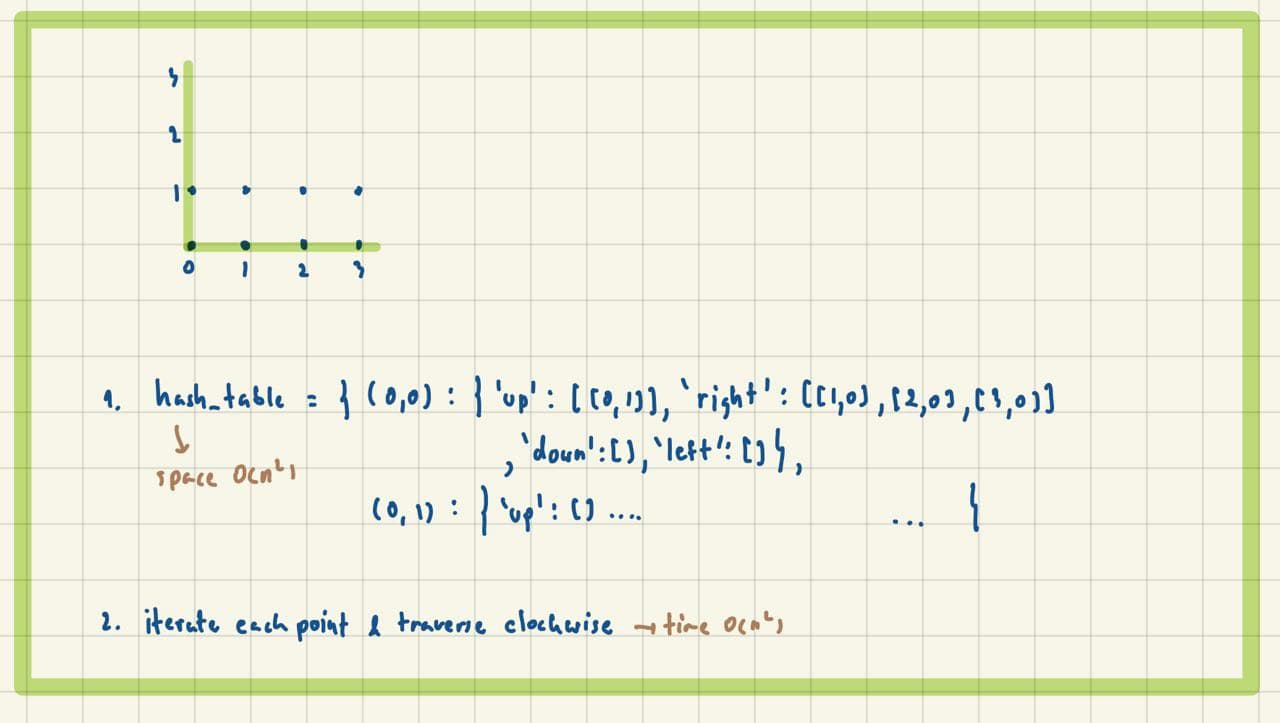

# Solution 2

In [3]:
# Time O(n^2)
# Space O(n)

def rectangleMania(coords):
  coords_table = get_coords_table(coords)
  return get_regtangle_count(coords, coords_table)


def get_coords_table(coords):
  coords_table = {'x': {}, 'y': {}}
  for coord in coords:
    x, y = coord
    if x not in coords_table['x']:
      coords_table['x'][x] = []
    coords_table['x'][x].append(coord)
    if y not in coords_table['y']:
      coords_table['y'][y] = []
    coords_table['y'][y].append(coord)
  return coords_table

def get_regtangle_count(coords, coords_table):
  rectangle_count = 0
  for coord in coords:
    lower_left_y = coord[1]
    rectangle_count += clockwise_count_rectangles(coord, coords_table, 'up', lower_left_y)
  return rectangle_count

def clockwise_count_rectangles(coord1, coords_table, direction, lower_left_y):
  x1, y1 = coord1
  if direction == 'down':
    relevant_coords = coords_table['x'][x1]
    for coord2 in relevant_coords:
      lower_right_y = coord2[1]
      if lower_left_y == lower_right_y:
        return 1
    return 0
  else:
    rectangle_count = 0
    if direction == 'up':
      relevant_coords = coords_table['x'][x1]
      for coord2 in relevant_coords:
        y2 = coord2[1]
        if y2 > y1:
          rectangle_count += clockwise_count_rectangles(coord2, coords_table, 'right', lower_left_y)
    elif direction == 'right':
      relevant_coords = coords_table['y'][y1]
      for coord2 in relevant_coords:
        x2 = coord2[0]
        if x2 > x1:
          rectangle_count += clockwise_count_rectangles(coord2, coords_table, 'down', lower_left_y)

    return rectangle_count


In [4]:
coords = [
  [0, 0], [0, 1], [1, 1], [1, 0],
  [2, 1], [2, 0], [3, 1], [3, 0],
]

rectangleMania(coords)

6

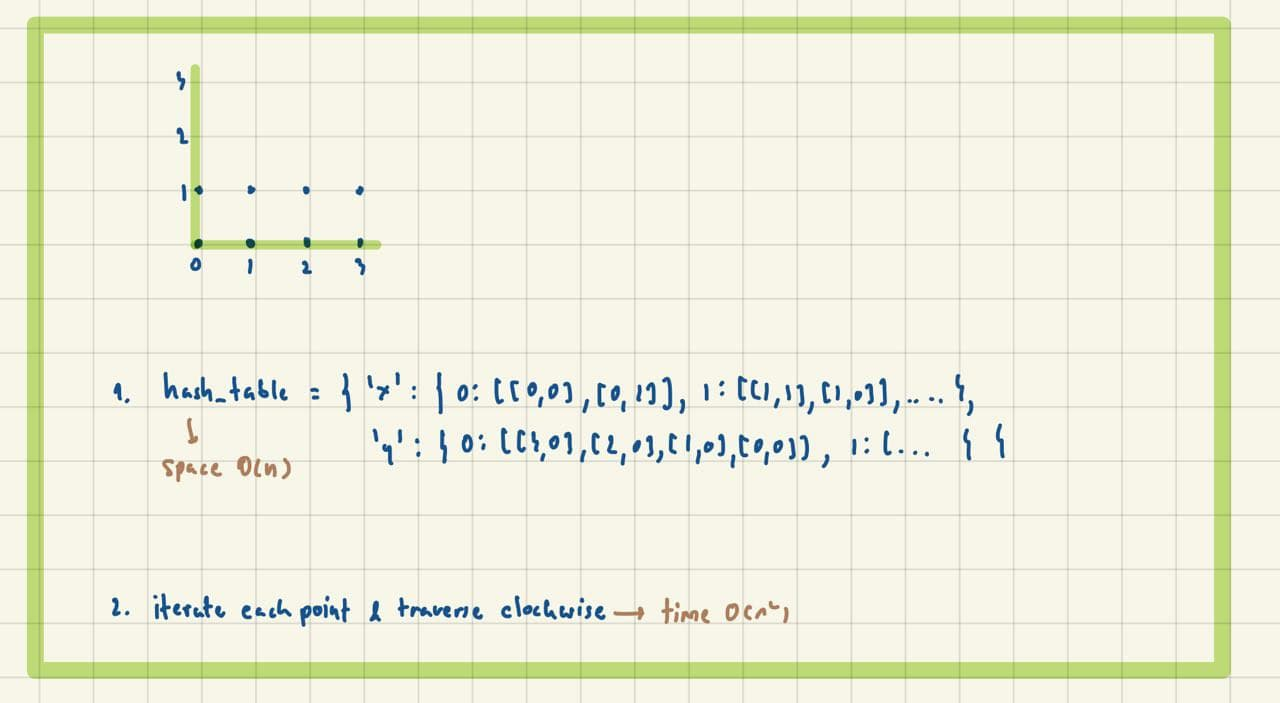

# Solution 3: Best One

In [5]:
# Time O(n^2)
# Spacce O(n)

def rectangleMania(coords):
	coords_table = get_coords_table(coords)
	return get_rectangle_counts(coords, coords_table)

def get_rectangle_counts(coords, coords_table):
	rectangle_count = 0
	for coord1 in coords:
		x1, y1 = coord1
		for coord2 in coords:
			x2, y2 = coord2
			if not is_valid_pair_points(coord1, coord2):
				continue
			if (x1, y2) in coords_table and (x2, y1) in coords_table:
				rectangle_count += 1
	return rectangle_count

def is_valid_pair_points(coord1, coord2):
	x1, y1 = coord1
	x2, y2 = coord2
	return x2 > x1 and y2 > y1

def get_coords_table(coords):
	coords_table = set()
	for coord in coords:
		coord_key = (coord[0], coord[1])
		coords_table.add(coord_key)
	return coords_table

In [6]:
coords = [
  [0, 0], [0, 1], [1, 1], [1, 0],
  [2, 1], [2, 0], [3, 1], [3, 0],
]

rectangleMania(coords)

6

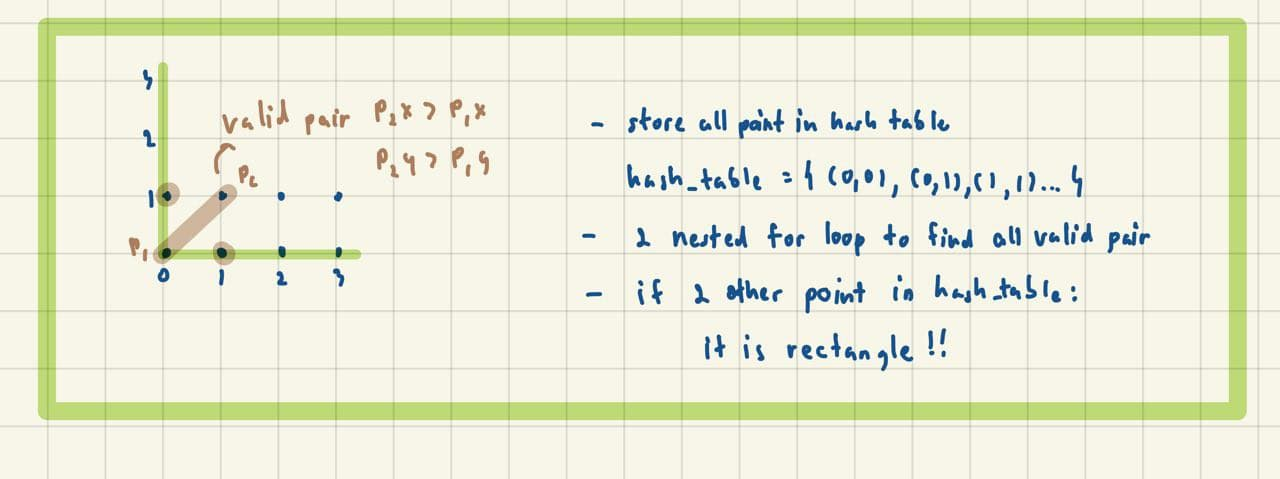